In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Time Series Forecasting

# Data Profiling

In [3]:
#Import Packages
#%pip install Prophet

In [4]:
#Load dataset
df = pd.read_csv('monthly-car-sales.csv')

In [5]:
#preview dataset
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [6]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


# Data Cleansing

In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [8]:
df.columns = ['ds', 'y']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


# Exploratory Data Analysis

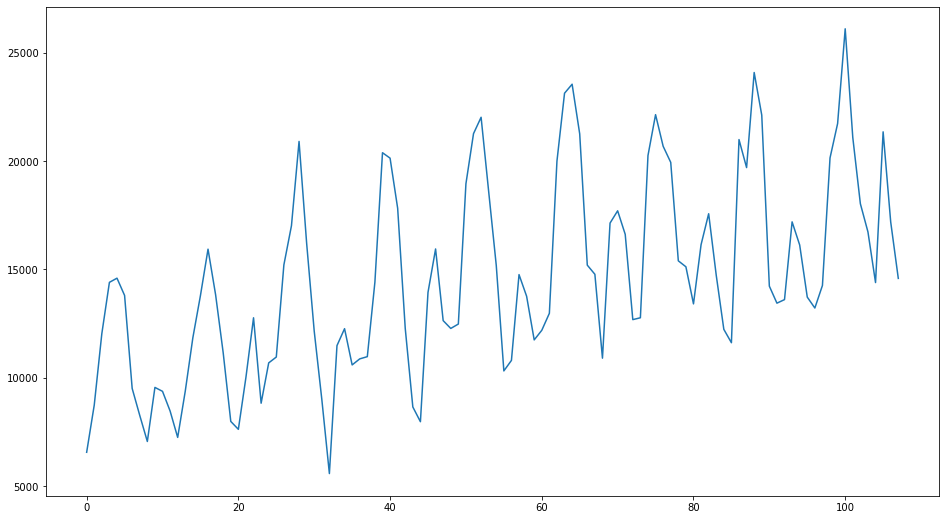

In [10]:
plt.figure(figsize=(16,9))
df['y'].plot()
plt.show()

# Feature Engineering

no feature engineering is needed

# Preprocessing

-Train test

In [11]:
train = df.drop(df.index[-12:]) #drop last 12 months
test = df.drop(df.index[:-12]) #choose last 12 months

In [12]:
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [13]:
test.head()

,ds,y
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099


In [14]:
X_train = pd.DataFrame(train['ds'])
y_train = pd.DataFrame(train['y'])

In [15]:
X_test = pd.DataFrame(test['ds'])
y_test = pd.DataFrame(test['y'])

# Modelling

In [16]:
model = Prophet()
model.fit(train)

11:09:33 - cmdstanpy - INFO - Chain [1] start processing
11:09:34 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
y_pred = model.predict(X_test)

In [18]:
yhat = y_pred['yhat'].values

In [19]:
yhat

array([14512.98439689, 14930.90562927, 20842.17617187, 23000.67913103,
       23350.15715933, 20972.26825767, 17359.53927678, 14785.20570325,
       13521.40595927, 17058.06396199, 17418.70122152, 15808.94518601])

# Evaluate Model

In [21]:
MAPE = mean_absolute_percentage_error(y_test, yhat)
MAPE

0.07187183098630126

# TASK (DATA SHAMPO)

In [22]:
df = pd.read_csv('shampoo_sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


# Data Cleansing

In [24]:
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
df['Time_Stamp'] = pd.DataFrame(date, columns=['Date'])
df.head()

,Month,Sales,Time_Stamp
0,1-01,266.0,2001-01-31
1,1-02,145.9,2001-02-28
2,1-03,183.1,2001-03-31
3,1-04,119.3,2001-04-30
4,1-05,180.3,2001-05-31


In [26]:
df.tail()

,Month,Sales,Time_Stamp
31,3-08,407.6,2003-08-31
32,3-09,682.0,2003-09-30
33,3-10,475.3,2003-10-31
34,3-11,581.3,2003-11-30
35,3-12,646.9,2003-12-31


In [27]:
df = df.drop(['Month'], axis=1)
df.head()

,Sales,Time_Stamp
0,266.0,2001-01-31
1,145.9,2001-02-28
2,183.1,2001-03-31
3,119.3,2001-04-30
4,180.3,2001-05-31


In [28]:
df.columns = ['y','ds']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       36 non-null     float64       
 1   ds      36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


# Data Exploration

In [30]:
df.describe()

,y
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


<AxesSubplot:>

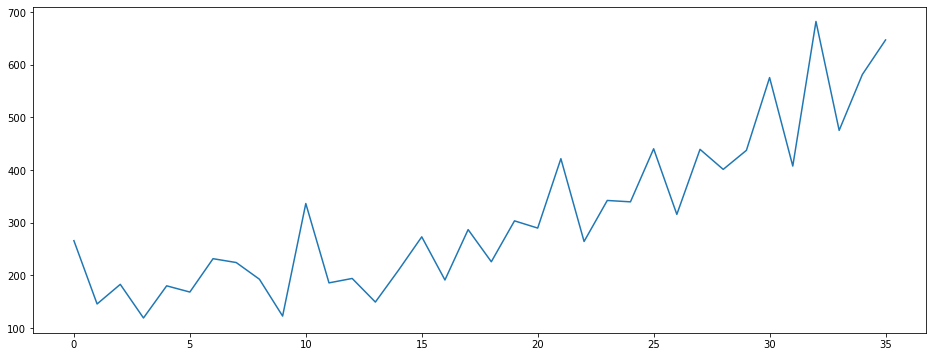

In [31]:
plt.figure(figsize=(16,6))
df['y'].plot()

# Preprocessing modeling

In [32]:
train = df.drop(df.index[-6:]) 
test = df.drop(df.index[:-6]) 

In [33]:
train.tail()

,y,ds
25,440.4,2003-02-28
26,315.9,2003-03-31
27,439.3,2003-04-30
28,401.3,2003-05-31
29,437.4,2003-06-30


In [34]:
test.head()

,y,ds
30,575.5,2003-07-31
31,407.6,2003-08-31
32,682.0,2003-09-30
33,475.3,2003-10-31
34,581.3,2003-11-30


In [35]:
X_train = pd.DataFrame(train['ds'])
y_train = pd.DataFrame(train['y'])

In [36]:
X_test = pd.DataFrame(test['ds'])
y_test = pd.DataFrame(test['y'])

In [37]:
y_test

,y
30,575.5
31,407.6
32,682.0
33,475.3
34,581.3
35,646.9


# Modeling

In [38]:
model = Prophet()
model.fit(train)

11:13:40 - cmdstanpy - INFO - Chain [1] start processing
11:13:40 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-07-31,410.200911,250.453900,301.058605,409.929141,410.443758,-135.853734,-135.853734,-135.853734,-135.853734,-135.853734,-135.853734,0.0,0.0,0.0,274.347176
1,2003-08-31,422.657847,414.390731,465.101795,421.780609,423.416614,18.382924,18.382924,18.382924,18.382924,18.382924,18.382924,0.0,0.0,0.0,441.040771
2,2003-09-30,434.712947,422.003990,472.296068,433.083815,436.182515,13.424260,13.424260,13.424260,13.424260,13.424260,13.424260,0.0,0.0,0.0,448.137207
3,2003-10-31,447.169884,747.971587,799.014083,444.655982,449.567893,326.061892,326.061892,326.061892,326.061892,326.061892,326.061892,0.0,0.0,0.0,773.231775
4,2003-11-30,459.224984,214.484848,265.738815,455.697459,462.678838,-218.401550,-218.401550,-218.401550,-218.401550,-218.401550,-218.401550,0.0,0.0,0.0,240.823434
5,2003-12-31,471.681920,506.110220,560.621482,466.823667,476.347021,61.767509,61.767509,61.767509,61.767509,61.767509,61.767509,0.0,0.0,0.0,533.449429


In [41]:
yhat = y_pred['yhat'].values

In [42]:
yhat

array([274.34717641, 441.04077116, 448.13720697, 773.23177526,
       240.82343363, 533.44942883])

# Evaluate Model

In [43]:
MAPE = mean_absolute_percentage_error(y_test, yhat)
MAPE

0.38935997239687486

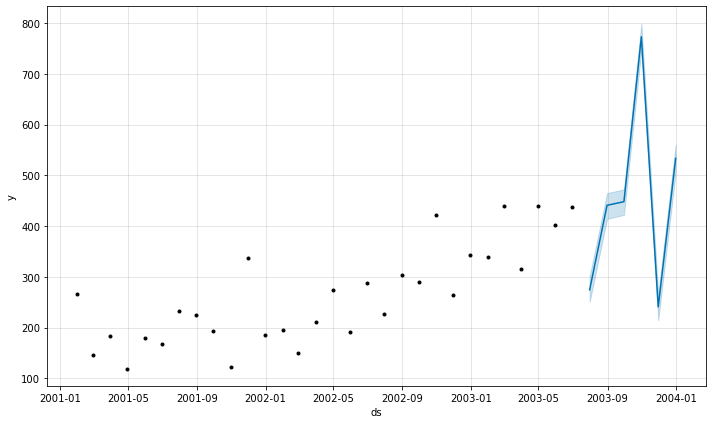

In [44]:
fig = model.plot(y_pred)